In [15]:
import pandas as pd

In [16]:
df = pd.read_csv("income.csv")
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [17]:
import matplotlib.pyplot as plt

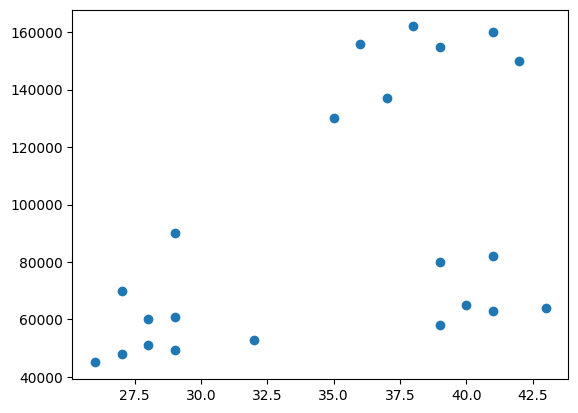

In [18]:
plt.scatter(df.Age,df.Income)

In [19]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income']])
y_pred

c:\Users\callr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [21]:
df['cluster'] = y_pred

In [22]:
df

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


Text(0, 0.5, 'Income')

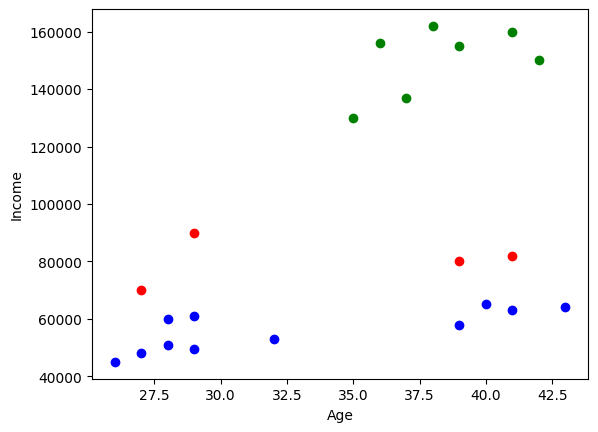

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1.Income,color='blue')
plt.scatter(df2.Age,df2.Income,color='green')
plt.scatter(df3.Age,df3.Income,color='red')

plt.xlabel("Age")
plt.ylabel("Income")

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
scaler.fit(df[['Income']])

MinMaxScaler()

In [32]:
df['Income'] = scaler.transform(df[['Income']])

In [35]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

In [36]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [39]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income']])
y_pred
df.cluster = y_pred

c:\Users\callr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Income')

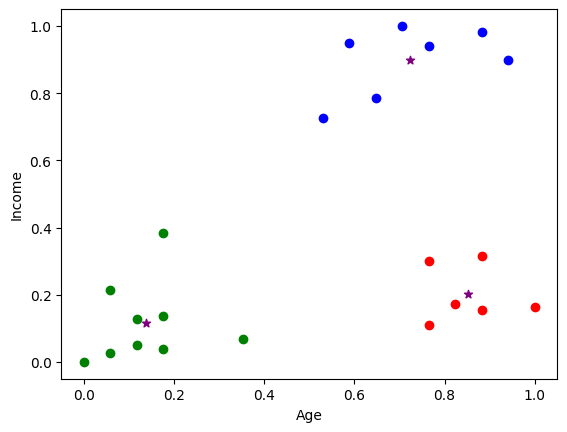

In [43]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1.Income,color='blue')
plt.scatter(df2.Age,df2.Income,color='green')
plt.scatter(df3.Age,df3.Income,color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*")
plt.xlabel("Age")
plt.ylabel("Income")

In [41]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [49]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)


c:\Users\callr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\callr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\callr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\callr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [50]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26217927623452136,
 0.21878010893330452,
 0.16869711728567788,
 0.13937852495507838,
 0.10188787724979426]

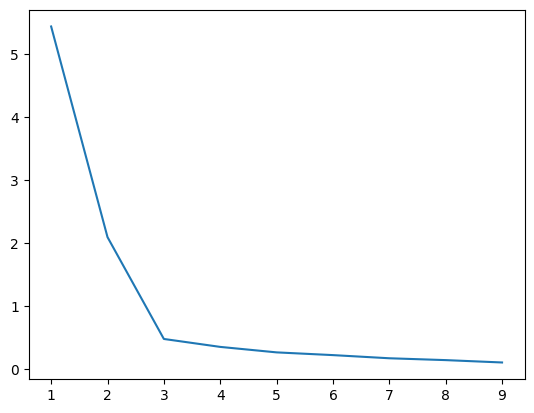

In [51]:
plt.plot(k_rng,sse)
